<p><img alt="UdeA logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<div align="center">
  
<h1> <b> Laboratorio #5 Aprendizaje estadistico,ABC Modelo </b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>


<div align="right">       

<h3><i> <b> Ortíz Campo Jose David</b> <br>  
Universidad de Antioquia <br>
Instituto de Física  <br>
jose.ortizc@udea.edu.co

</i></h3>
</div>


---

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Pregunta 1

1.Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Pregunta 2
Entender el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Del df.info() extraigo que la información del data frame es acerca de unas ubicaciónes geograficas la cual tiene información como longitud, latitud, número toral de habitaciones, baños... todos estos son datos de tipo float. Sin embargo, hay una caracteristica que es distinta y es el oceano mas proximo a la localidad, que claramente debería de ser tipo str, pero el tipo de dato resultante es un objeto.
Por otro lado el df.describe() habla sobre el numero de conteos de datos, la media de estos, la desviación estandar, el minimo, el maximo y la caracterización de los percentiles. El df.isnull().sum() cuenta sobre las diferentes caracteristicas el numero de elementos nulos dentro de cada caracteristica. Noto que solamente la caracteristica que tiene elementos nulos es el numero de baños, esto quiere decir que hay lugares/establecimientos que no tienen baños o simplemento los datos no fueron tomados adecuadamente. Sin, emabargo para poder trabajar con estos datos a futuro es mejor limpiar los datos, para esto es prudente eliminar los datos que no tienen baños.

Limpieza de Nan de baños

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## Pregunta 3

3.Determinar los elementos únicos dentro de la columna ocean_proximity


In [7]:
df['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

De acá se obserba que los unicos elementos que se encuentran en la caracteristica de ocean_proximity son:


-'NEAR BAY'

-'<1H OCEAN'

'INLAND'

'NEAR OCEAN'

'ISLAND'


Lo cual indica que hay localidades que están cerca de la baia, además de que algunos están a menos de 1 hora del oceano, hay otros que están en islas, otros que están cerca de el oceano, y otros que definitivamente están alejados que son INLAND.

## Pregunta 4

4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [9]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]


In [10]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
df.groupby('ocean_proximity')[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


Basicamente con este codigo estoy segregando a las localidades por medio de su caracteristica 'ocean_proximity' y luego con estos datos separados, se les está sacando la media. Estos nos da la media de las caracteristicas.

Hay que tener en cuenta que se podrá hacer esto siempre y cuando las caracteristicas sean reales, entero... es decir valores numericos.

## Pregunta 5


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

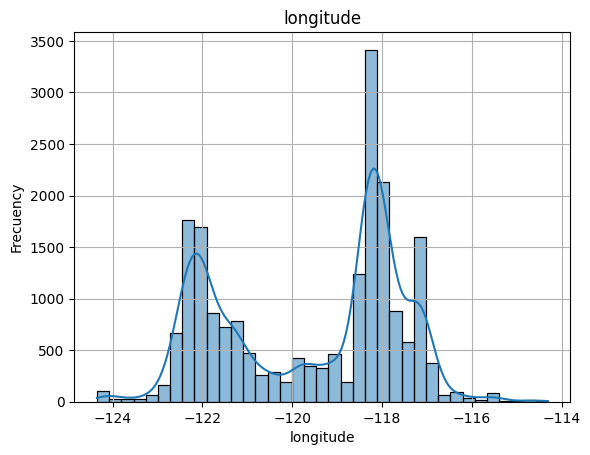

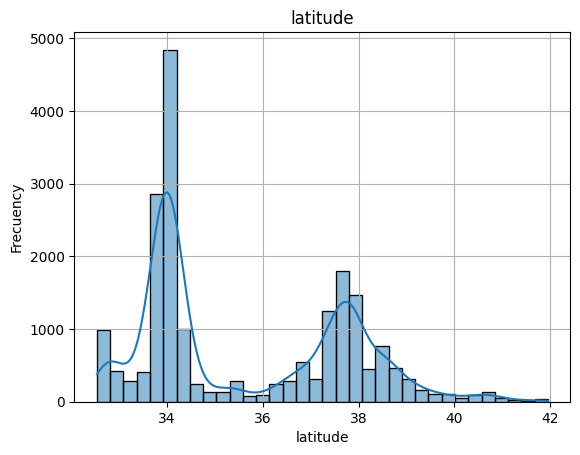

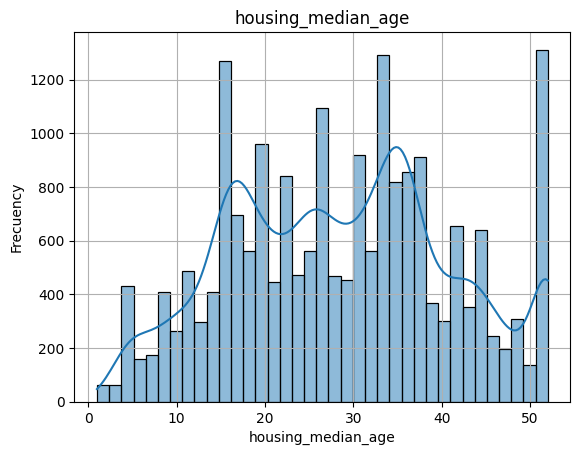

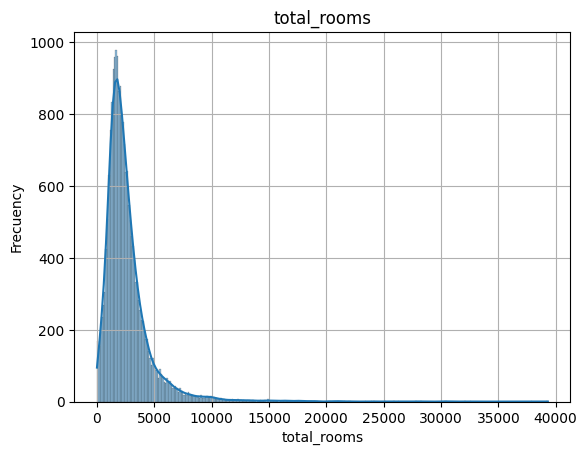

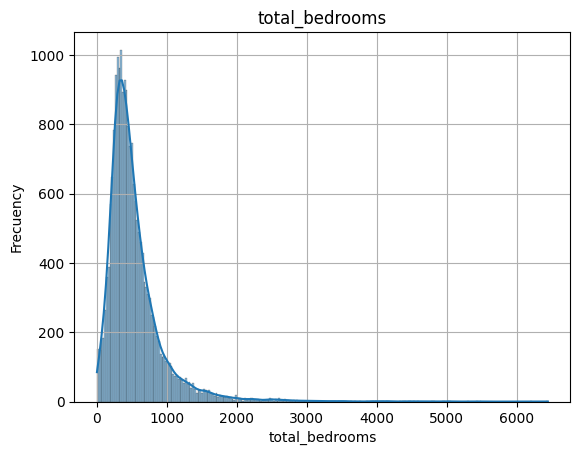

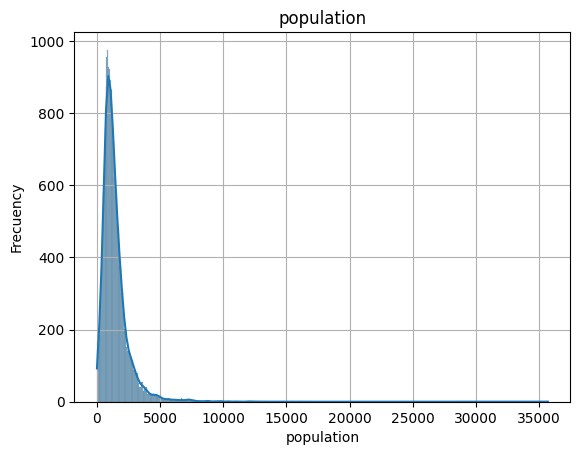

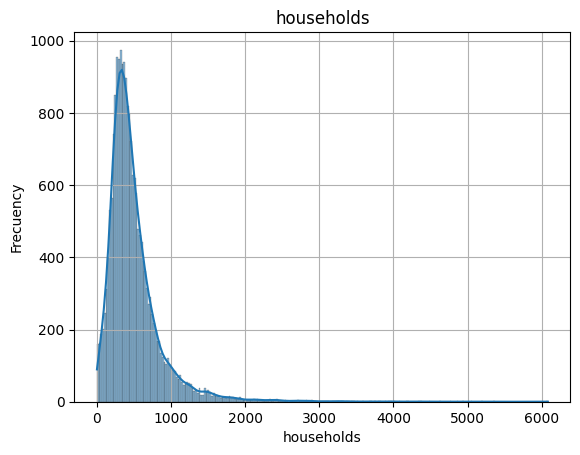

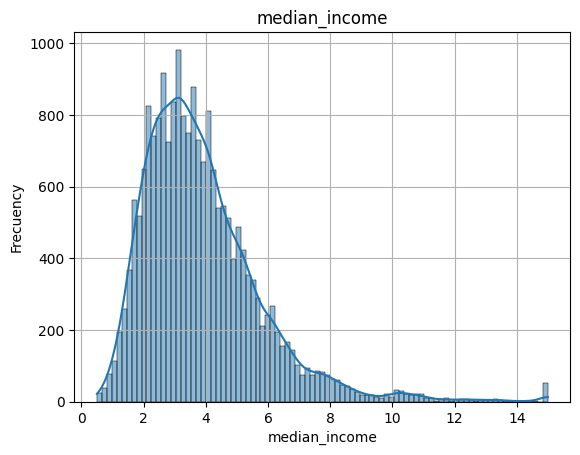

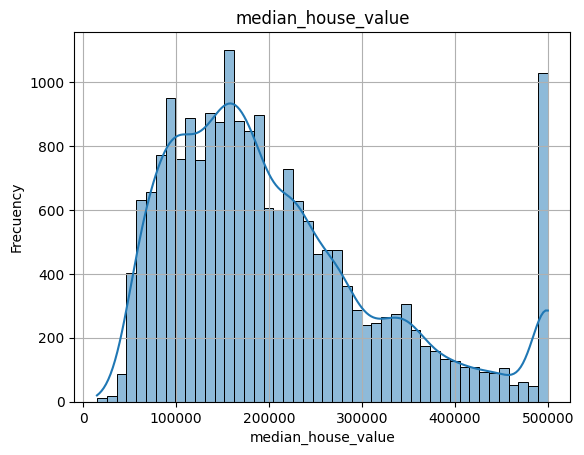

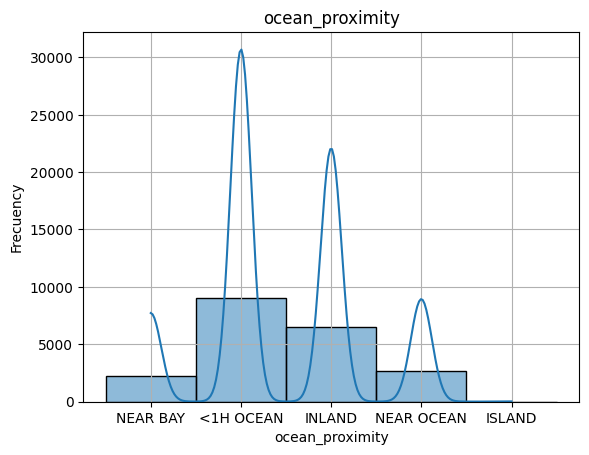

In [12]:
columnas=df.columns

for i,col in enumerate(columnas):
  sns.histplot(df[col],kde='True')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Frecuency')
  plt.grid()

  plt.show()


Es interesante notar que muchas de las caracteristicas siguen  como una especie de  distribución gaussiana mostrando así que los datos fueron tomados de forma aleatoria.

## Pregunta 6


Aunque el problema no pide algo en particular, se pide que se vea el siguiente ejemplo. Sin embargo, supongo será apropiado limpiar los datos de valores atipicos por medio de este metodo de cuartiles

In [13]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x78071ade0750>,
 'caps': [<matplotlib.lines.Line2D at 0x78071ac31250>,
 'boxes': [<matplotlib.lines.Line2D at 0x78071ad80b50>],
 'medians': [<matplotlib.lines.Line2D at 0x78071ad448d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78071ab9fd50>],
 'means': []}

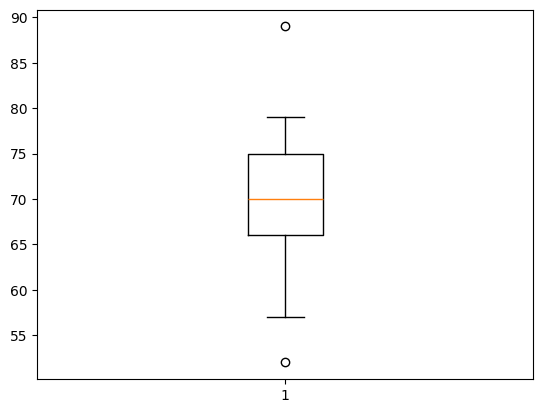

In [14]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

## Pregunta 7


7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

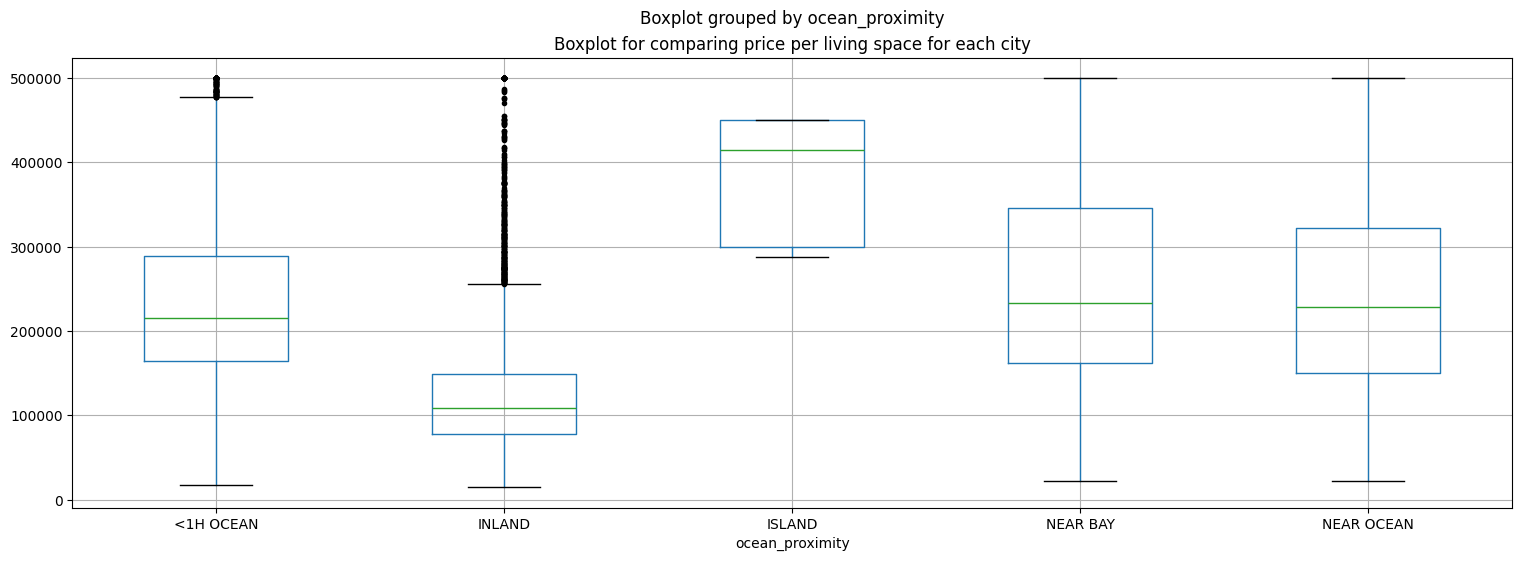

In [15]:
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

In [16]:
caracte=[]
for i in df['ocean_proximity'].unique():
  caracte.append(i)
caracte


['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [17]:
datos_filtrados = []

for i in caracte:
  grupo=df[df['ocean_proximity']==i]
  Q1 = grupo['median_house_value'].quantile(0.25)
  Q3 = grupo['median_house_value'].quantile(0.75)
  IQR = Q3 - Q1
  grupofiltrado = grupo[~((grupo['median_house_value'] < (Q1 - 1.5 * IQR)) | (grupo['median_house_value'] > (Q3 + 1.5 * IQR)))]
  datos_filtrados.append(grupofiltrado)
df_filtrado = pd.concat(datos_filtrados)
df_filtrado

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND


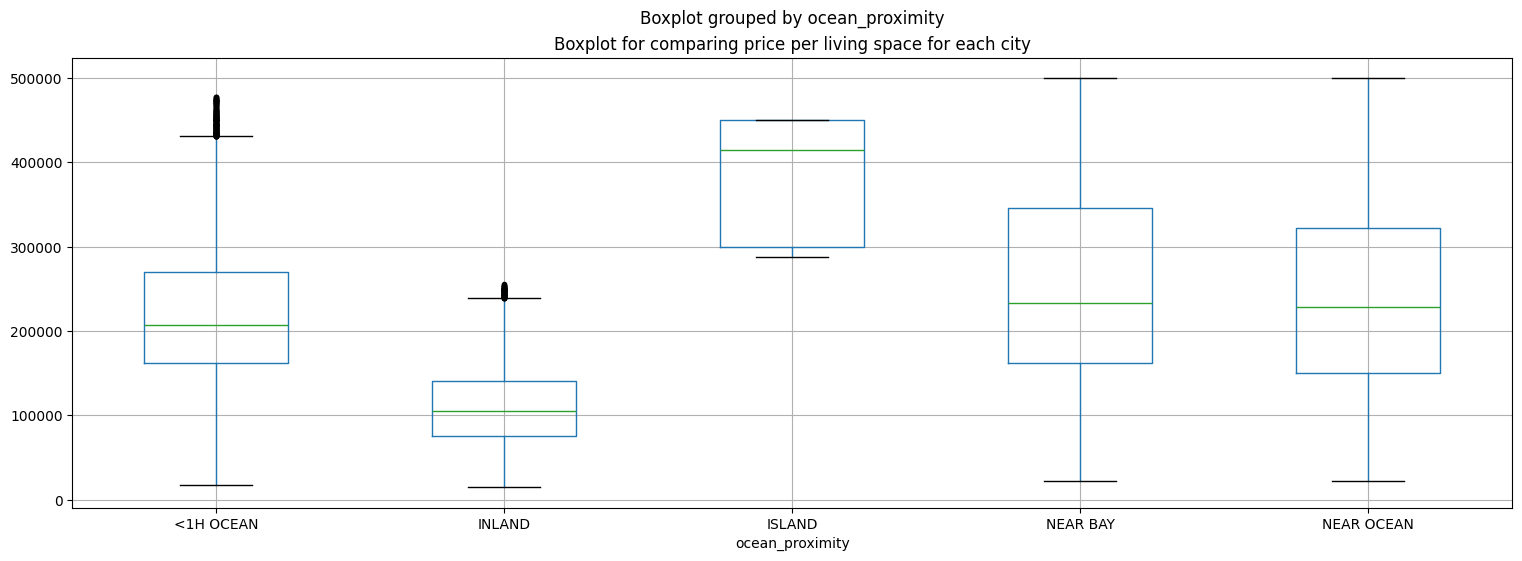

In [18]:
df_filtrado.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

Hay que tener en cuenta que los datos "atipicos" se deberian de eliminar según  la mascara realizada. Sin embargo esto no ocurrió así que basicamente hay que variar los rangos de "cuartiles" por ejemplo, si la mascara se realiza sobre un 65%


In [19]:
datos_filtrados = []

for i in caracte:
  grupo=df[df['ocean_proximity']==i]
  Q1 = grupo['median_house_value'].quantile(0.25)
  Q3 = grupo['median_house_value'].quantile(0.65)
  IQR = Q3 - Q1
  grupofiltrado = grupo[~((grupo['median_house_value'] < (Q1 - 1.5 * IQR)) | (grupo['median_house_value'] > (Q3 + 1.5 * IQR)))]
  datos_filtrados.append(grupofiltrado)
df_filtrado = pd.concat(datos_filtrados)
df_filtrado

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND


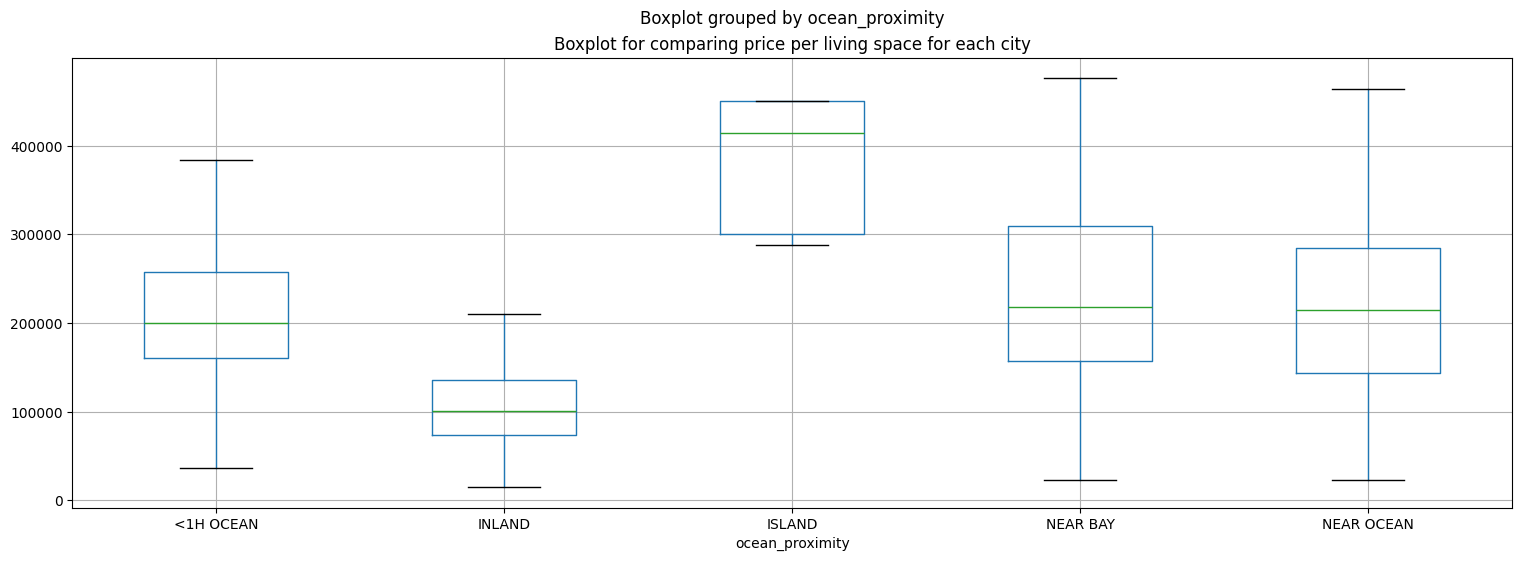

In [20]:
df_filtrado.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))

plt.title('Boxplot for comparing price per living space for each city')
plt.show()

Así se muestra que se deben de cambiar los percentiles par apoder hacer un filtrado adecuado.

Por otro lado se puede hacer un filtrado de los datos haciendo la segregación de ocean_proximity y luego realizando los distintos boxplots para las otras caracteristicas.





Generalización

In [21]:



columnas_filtrar = [col for col in df.columns if col != 'ocean_proximity']


caracte = df['ocean_proximity'].unique()


indices_validos = set(df.index)

for col in columnas_filtrar:
    datos_filtrados_columna = []

    for i in caracte:
        grupo = df[df['ocean_proximity'] == i]
        Q1 = grupo[col].quantile(0.25)
        Q3 = grupo[col].quantile(0.65)
        IQR = Q3 - Q1


        grupofiltrado = grupo[~((grupo[col] < (Q1 - 1.5 * IQR)) | (grupo[col] > (Q3 + 1.5 * IQR)))]

        datos_filtrados_columna.append(grupofiltrado)


    df_col_filtrado = pd.concat(datos_filtrados_columna)


    indices_validos &= set(df_col_filtrado.index)

df_filtrado = df.loc[list(indices_validos)].copy()



<Axes: title={'center': 'median_house_value'}, xlabel='ocean_proximity'>

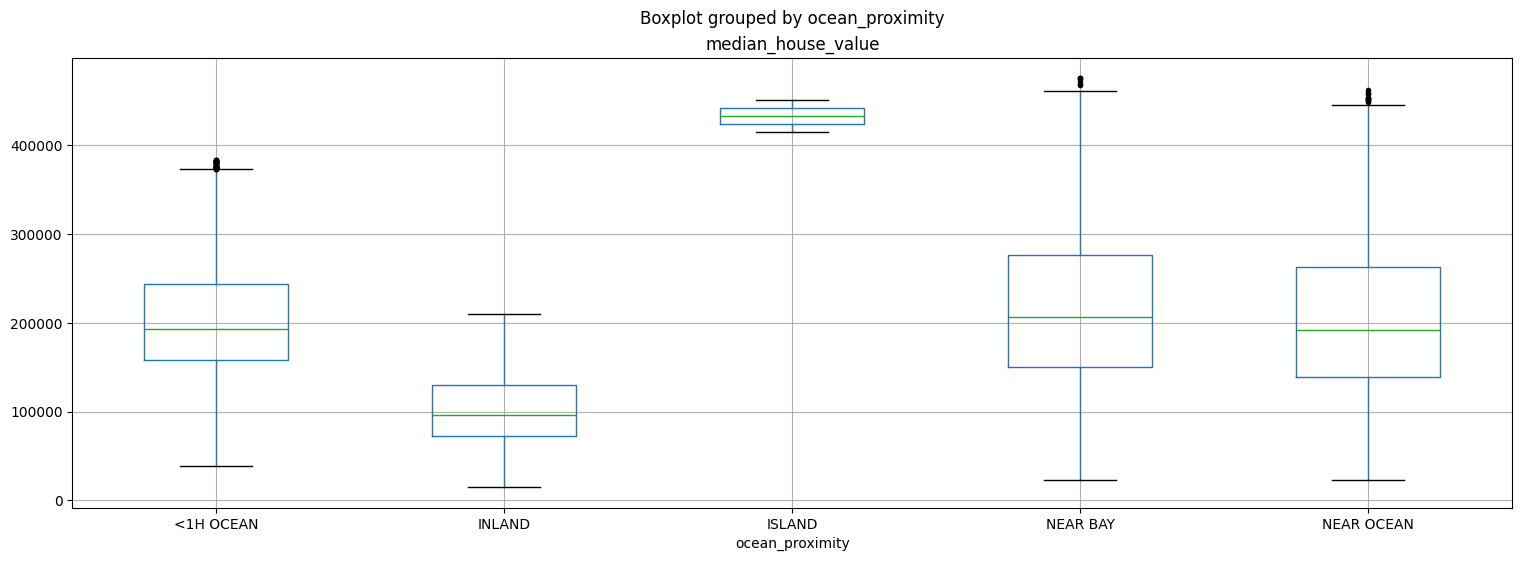

In [22]:
df_filtrado.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))

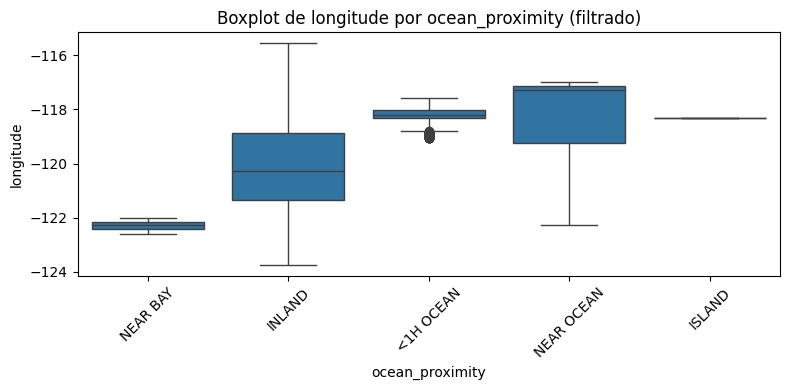

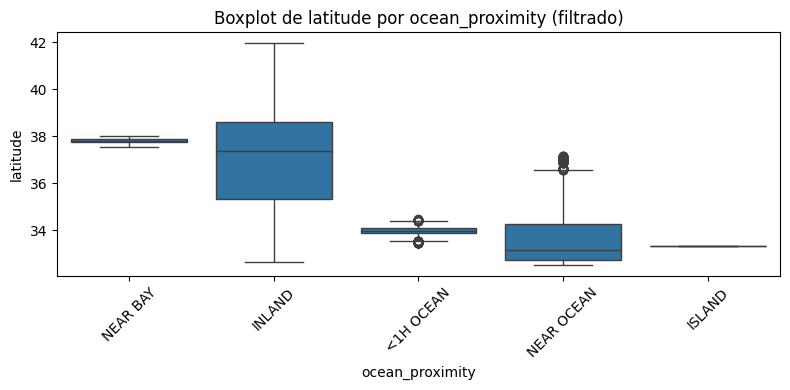

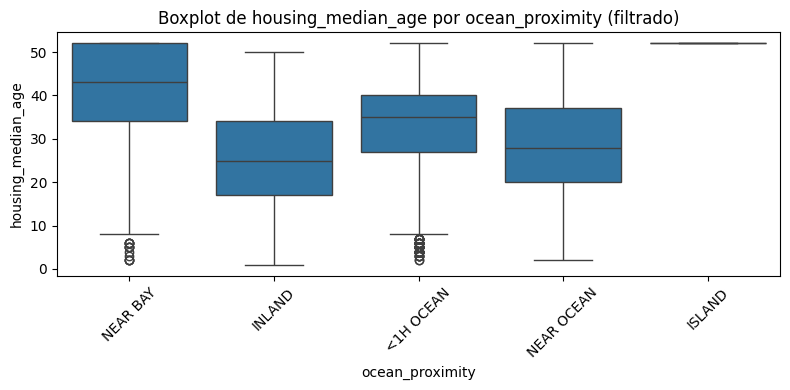

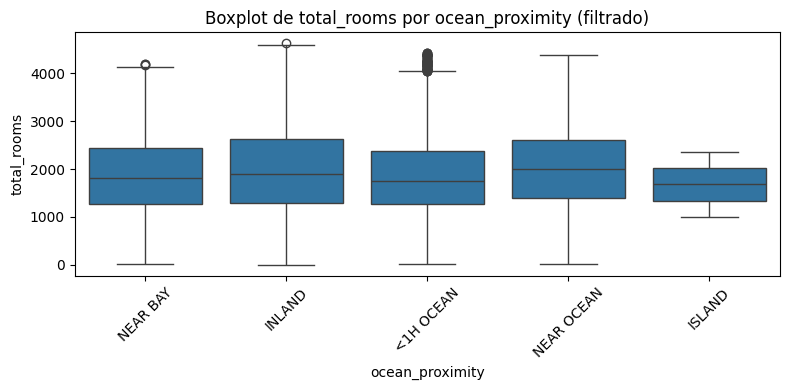

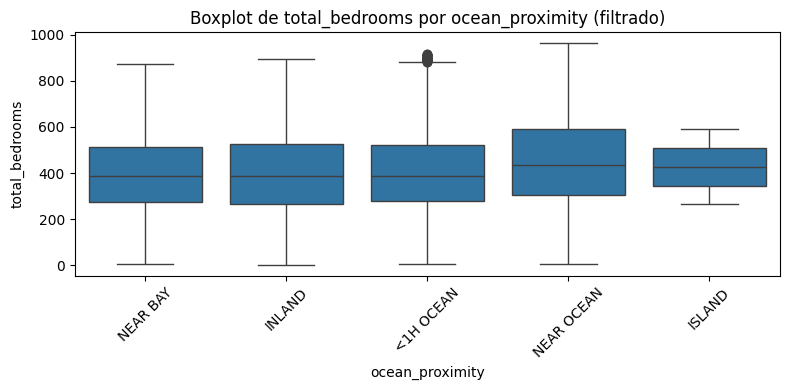

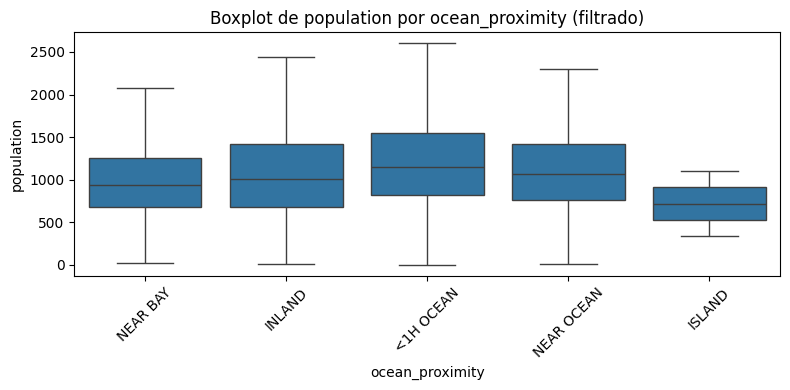

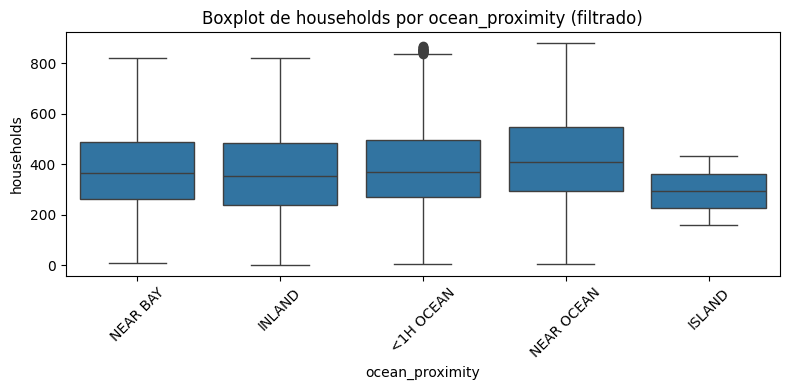

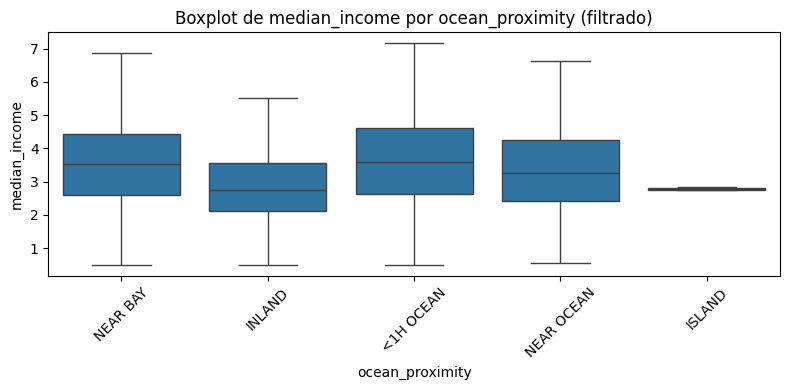

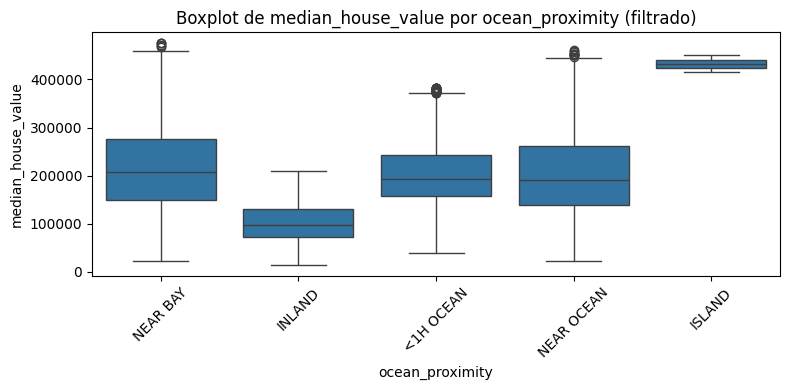

In [23]:


for col in columnas_filtrar:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='ocean_proximity', y=col, data=df_filtrado)
    plt.title(f'Boxplot de {col} por ocean_proximity (filtrado)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Claramente el rango escogido para filtrar las caracteristicas no es generico, pues para algunas caracteristicas quedan algunos datos sin limpiar y/o excluir. Por tanto si desease realizar un filtrado sobre cada una de las columnas tendría que fijar un intervalo para cada una de las caracteristicas.

Not:
 El punto no especifica realizar un filtrado sobre cada una de las caracteristicas, así que los dejaré limpios solamnete para la caracteristica del costo medio de casa.

## Pregunta 8
Se pide encontrar la matriz de correlación.

In [24]:
df1= df.drop(columns=['ocean_proximity'])
matriz_corr=df1.corr()
matriz_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


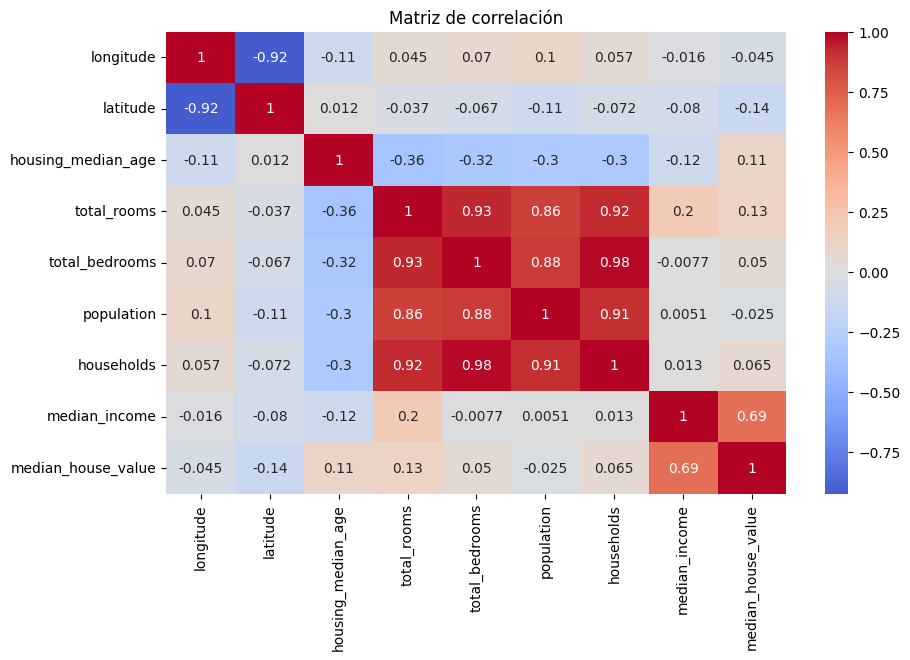

In [25]:
corr_matrix = df1.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.title('Matriz de correlación')
plt.show()

En la matriz de correlación claramente la diagonal tendrá valores de 1 esto por supuesto se debe a que seria los mismos caracteristicas contra los mismo caracteristica.Por otro lado, se observa que hay algunas caracteristicas que tienen mucho sentido que se encuentren correlacionadas, por ejemplo el numero de dormitorios con el numero de habitaciones, como el numero de habitaciones contiene el numero de dormitorios claramente existirá una relación entre estos, además de que debe existir una relación de proporcionalidad entre el numero de personas que habitan los lugares en comparación respecto a el numero toal de habitaciones, lo mismo con el numero de baños. Y hay otros que no tendiran mucho que ver por ejemplo la ubicación geografica con la cantidad de habitaciones.



## Pregunta 9

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.

```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```


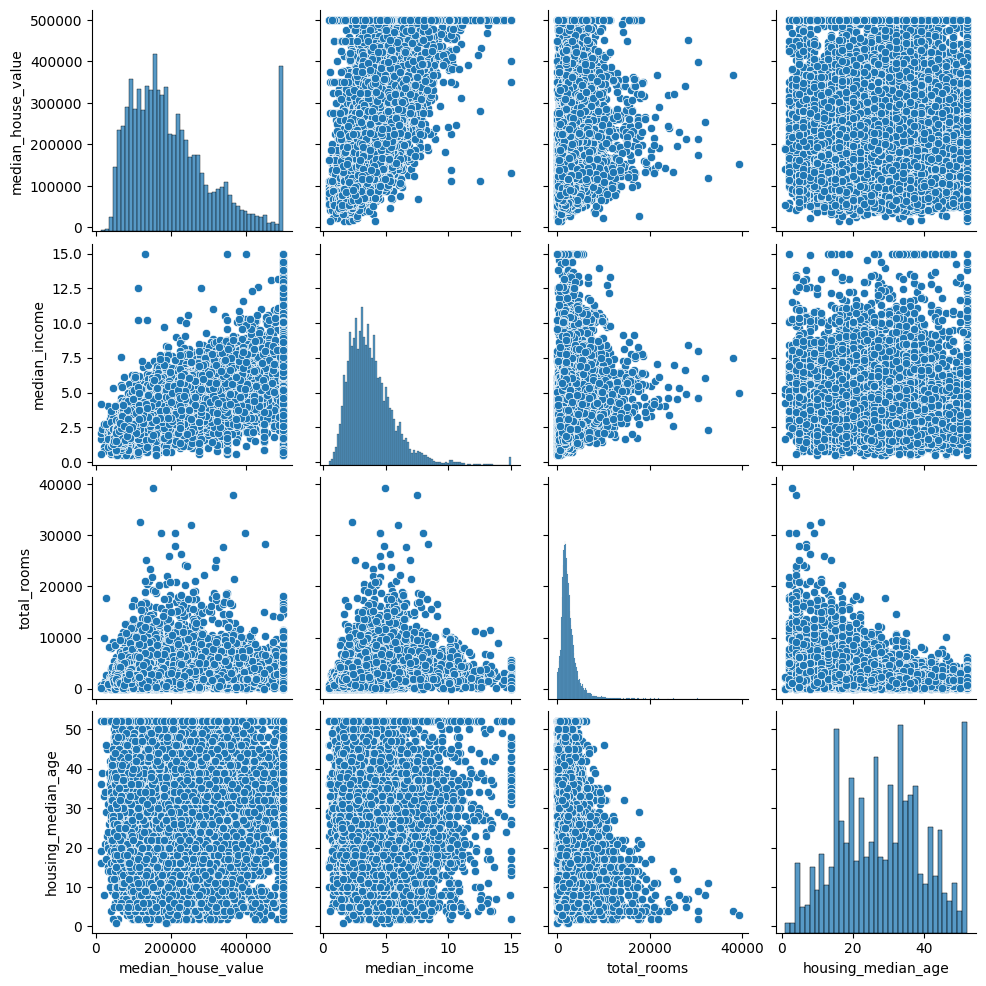

In [26]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

sns.pairplot(df[cols])

## Pregunta 10



10.Realiza un scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

Aquí se me está pidiendo un scatter plot. Por tanto solo realizaré uno, que relacione las variables: numero de habitaciones con numero de baños y que se vean segregados por color con el valor medio de la casa.

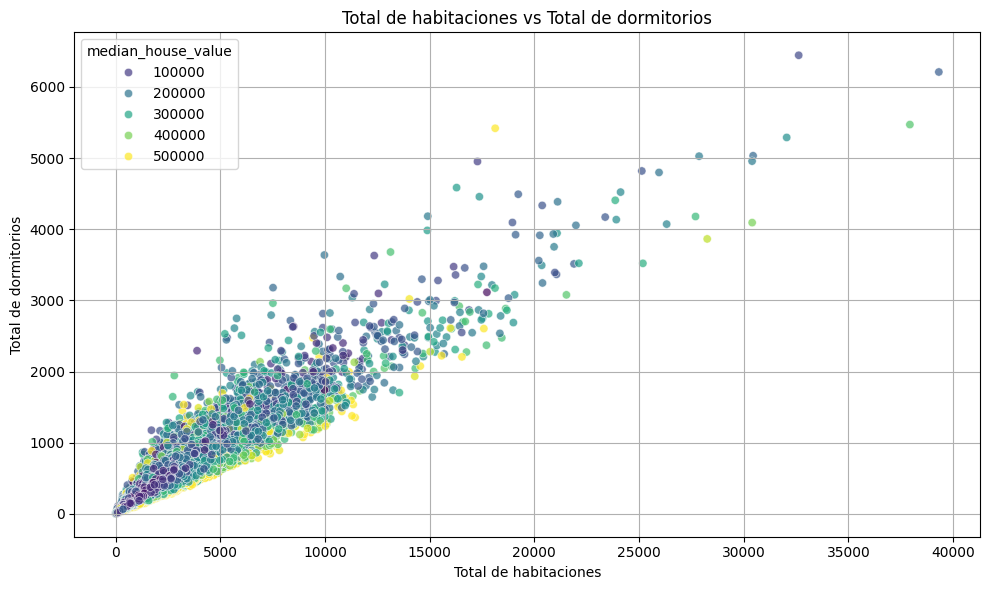

In [27]:


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='total_rooms',
    y='total_bedrooms',
    hue='median_house_value',
    palette='viridis',
    alpha=0.7
)
plt.title('Total de habitaciones vs Total de dormitorios')
plt.xlabel('Total de habitaciones')
plt.ylabel('Total de dormitorios')
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:
df['median_house_value'].unique()

array([452600., 358500., 352100., ..., 425800., 200700.,  47000.])

El error(o mas bien lo que no tiene sentido) que sale ahí es debido a que los valores de median_house_value son continuos, por tanto solo salen unos valores posibles

## 2.0 Preparacion del data frame

## Pregunta 11



11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16346
4087


Se supone que un 80 % de los datos se están tomando para realizar el entrenamiento. El 20 % de los datos se están tomando para los test. Esta separación está siendo realizada de forma aleatoria lo que considero entonces es una buena forma de separar los datos, ya que el 80% me parece una una muestra significativa.

## Pregunta 12




12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [30]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

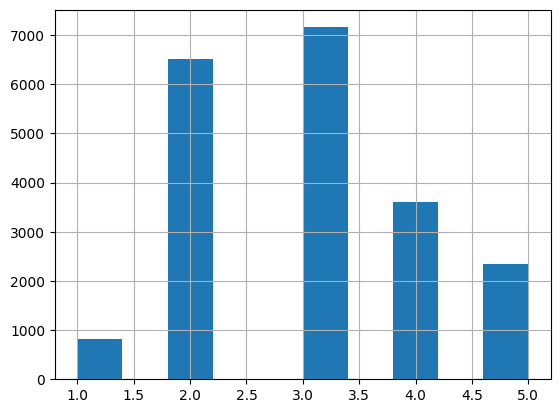

In [31]:
df.income_cat.hist()

Según entiendo lo que está haciendo el codigo es crear una especie de sesgo según la caracteristica de median_income. Crea 5 intervalo, y clasifica según estos. Esto proporcionará la forma de saber cuanto porcentaje de los datos están en cada uno de los intervalos. Esto proporciona una forma y/o criterio para poder escoger los datos respetando dicha proporcionalidad

Por otro lado se puede realizar de forma automatica dicha división

In [32]:


split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

El punto dice que hay que ejecutar las siguientes lineas de codigo y ver que se puede concluir

In [33]:
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

,count
income_cat,
3,0.352747
2,0.319161
4,0.175639
5,0.112138
1,0.040316


Debido a que creo que faltan salidas, le pondré prints

In [34]:
print(df["income_cat"].value_counts() / len(df))

income_cat
3    0.350218
2    0.318847
4    0.176724
5    0.114374
1    0.039838
Name: count, dtype: float64


In [35]:
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set)
)

income_cat
3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: count, dtype: float64


In [36]:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set)
)

income_cat
3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: count, dtype: float64


In [37]:
print(train_set["income_cat"].value_counts() / len(train_set))

income_cat
3    0.352747
2    0.319161
4    0.175639
5    0.112138
1    0.040316
Name: count, dtype: float64


Primero hay que tener en cuenta que todos estos son una forma de segregar al dataset según lo explicado en la pregunta anterior. Por otro lado, se observa que al dividir por la cantidad de datos se está encontrando la proporcionalidad que tienen estos diversos metodos de separación(test, entrenamiento,...). Al comparar la primera y segunda división en proporcion se nota que se parece mucho, la primera era la separación que se habia hecho a mano y la segunda la que se hizo usando una libreria que automatiza(solo datos de entrenamiento). Ambos difieren en su 5ta cifra significativa lo que brinda la idea de que el metodo de separación de la libreria(para datos de entrenamiento) está manteniendo la proporcionalidad que deberia de cumplir una muestra significativa. Lo mismo sucede con los datos de test. Esto es importante debido a que los datos que se pongan para ver si el modelo funciona debe de cumplir también la misma regla de proporcionalidad. La ultima separación es otra forma de segregar los datos de entrenamiento de una forma aleatoria usando split, con un 70 % de los datos totales. Este también se parece mucho a las proporcionalidades anteriores, sin embargo, tiene sentido pensar en que al cambiar el porcentaje puede(y de hecho con alta probabilidad) de que cambie los factores de proporcionalidad, pero en cualquier caso debe de mantenerce cercano a los de la población debido a que se están tomando de forma aleatoria.

Por ultimo se pide analizar los errores en este codigo

In [38]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039838,0.039883,0.038904,2.343711,0.113051
2,0.318847,0.318816,0.317348,0.470218,0.009787
3,0.350218,0.350135,0.354783,1.303667,0.023760
4,0.176724,0.176658,0.173232,1.975809,0.037478
5,0.114374,0.114509,0.115733,1.188213,0.118570


Como habia mencionado en la explicación anterior los valores se parecen mucho, solo que ahora es una manera cuantitativa de ver cuanto se parecen. Para esto se compara con la proporción de la población según la categorización definida. Se observa que via la liberia, da una buena forma de encontrar unos datos para test, y que es mucho mejor a que si se tomara de forma completamente aleatoria datos al azar para nuestro modelo.

## Pregunta 13

13.Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:


```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```

Claramente no se ha definido el df_train así que realizaré una copia del dataframe orignal para poder poder ejecutar estas lineas de codigo

In [39]:
df_train=strat_train_set.copy()

In [40]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

In [41]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
18052,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,<1H OCEAN,5,7.626263,0.123179,2.696970
17555,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,<1H OCEAN,3,4.818740,0.218361,3.145929
19195,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,<1H OCEAN,3,4.891791,0.197559,2.417910
17808,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,<1H OCEAN,5,6.629234,0.158107,3.723708
10265,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,<1H OCEAN,4,5.885932,0.165375,3.083650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17416,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,NEAR OCEAN,2,3.575758,0.275809,3.504132
2136,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,INLAND,3,5.061538,0.189210,3.003846
7354,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,<1H OCEAN,2,3.051867,0.306594,4.713693
11880,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,INLAND,3,5.347826,0.193410,2.169336


Basicamente solo agregué una columna en la cual para cada fila correspondinete se calcula la proporción de 2 caracteristicas.

Por otra parte hay un apartado extra entre la pregunta 13 y pregunta 14 que basicamente es para limpiar datos. Veamos si hay algún dato nulo

In [42]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [43]:
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

,0
total_bedrooms,0


El codigo quizá funciona con un dataframe que si tenga valores nulos

In [44]:

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19575240e+02,  3.56390609e+01,  2.86794935e+01,  2.64349168e+03,
        5.39510645e+02,  1.42772911e+03,  5.01013642e+02,  3.87020800e+00,
        2.07079816e+05,  3.00691301e+00,  5.43394299e+00,  2.12976050e-01,
        3.06517452e+00])

Basicamente el codigo está calculando las medias de las columnas. En el caso de que hubieran datos faltantes(no necesariamente toda una fila, si no alguna caracteristica) esta seria una buena forma de solucionar el problema. Pues, se puede reemplazar en los datos esa caracteristica faltante con la media de los datos no nulos.

## Pregunta 14





14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```

Al ejecutar el codigo me doy cuenta que aparece un error debido a la caracteristica, income_cat, por tanto debe de ser cambiada a un tipo de dato que si permita, sobre la caracteristica, sacar su media

In [45]:
df_train_num["income_cat"]=df_train_num["income_cat"].astype(int)
imp_mean.statistics_
df_train_num.median()

,0
longitude,-118.510000
latitude,34.260000
housing_median_age,29.000000
total_rooms,2131.000000
total_bedrooms,435.000000
population,1168.000000
households,410.000000
median_income,3.529900
median_house_value,179900.000000
income_cat,3.000000


Esto muestra cual es la media de cada caracteristica de todos los datos

Por otro lado notemos que se pide la matriz de caracteristicas

In [46]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

In [47]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,5.0,7.626263,0.123179,2.696970
1,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,3.0,4.818740,0.218361,3.145929
2,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,3.0,4.891791,0.197559,2.417910
3,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,5.0,6.629234,0.158107,3.723708
4,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,4.0,5.885932,0.165375,3.083650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,2.0,3.575758,0.275809,3.504132
16342,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,3.0,5.061538,0.189210,3.003846
16343,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,2.0,3.051867,0.306594,4.713693
16344,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,3.0,5.347826,0.193410,2.169336


## Pregunta 15

15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


In [48]:

df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [49]:
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,5.0,7.626263,0.123179,2.696970,1.0,0.0,0.0,0.0,0.0
1,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,3.0,4.818740,0.218361,3.145929,1.0,0.0,0.0,0.0,0.0
2,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,3.0,4.891791,0.197559,2.417910,1.0,0.0,0.0,0.0,0.0
3,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,5.0,6.629234,0.158107,3.723708,1.0,0.0,0.0,0.0,0.0
4,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,4.0,5.885932,0.165375,3.083650,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-120.46,34.65,22.0,1298.0,358.0,1272.0,363.0,1.6488,117500.0,2.0,3.575758,0.275809,3.504132,0.0,0.0,0.0,0.0,1.0
16342,-119.73,36.80,24.0,1316.0,249.0,781.0,260.0,3.7578,69200.0,3.0,5.061538,0.189210,3.003846,0.0,1.0,0.0,0.0,0.0
16343,-118.15,33.96,33.0,1471.0,451.0,2272.0,482.0,2.5385,160900.0,2.0,3.051867,0.306594,4.713693,1.0,0.0,0.0,0.0,0.0
16344,-117.39,33.98,37.0,2337.0,452.0,948.0,437.0,3.1450,169100.0,3.0,5.347826,0.193410,2.169336,0.0,1.0,0.0,0.0,0.0


Basicamente lo que primero hace es sacar todas los posibles valores de la caracteristica ocean_proximity, luego lo guarda en un nuevo dataset. Luego con OneHotEncoder crea una matriz que guarde de columnas con los valores unicos de la caracteristicas de ocean_proximity. Cada fila iesima tendrá una caracteristica y solo una de ocean_proximity. Entonces el codigo rellena en la columna, correspondinete a su caracteristica con un 1 y si es diferente con un 0. En lo ultimo se define un nuevo dataframe que contiene la información del dataframe original y concatena lo dicho con anterioridad. Esto se puede observar en las ultimas columnas. Por ejemplo como el dato de indice 0 tenía en la caracteristica ocean_proximity NEAR BAY entonces llenó solo(en la misma fila) con un 1 esta entrada en la columna correspondiente, las otras con ceros, precisamente para mostrar que no tiene estas otras caracteristicas.

## Pregunta 16

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


In [50]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale




scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

In [51]:
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.239879,0.500000,0.352941,0.019052,0.014277,0.007399,0.016116,0.999993,1.0,0.0,0.0,0.0,0.0
1,0.251012,0.508511,0.705882,0.079641,0.106145,0.057317,0.106890,0.173494,1.0,0.0,0.0,0.0,0.0
2,0.169028,0.626596,0.686275,0.033194,0.040037,0.018078,0.043907,0.203763,1.0,0.0,0.0,0.0,0.0
3,0.251012,0.517021,0.313725,0.094445,0.091092,0.058466,0.092090,0.433566,1.0,0.0,0.0,0.0,0.0
4,0.657895,0.143617,0.470588,0.039223,0.039572,0.022646,0.043085,0.324396,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.393725,0.223404,0.411765,0.032864,0.055400,0.035567,0.059530,0.079233,0.0,0.0,0.0,0.0,1.0
16342,0.467611,0.452128,0.450980,0.033321,0.038485,0.021806,0.042592,0.224680,0.0,1.0,0.0,0.0,0.0
16343,0.627530,0.150000,0.627451,0.037264,0.069832,0.063595,0.079099,0.140591,1.0,0.0,0.0,0.0,0.0
16344,0.704453,0.152128,0.705882,0.059292,0.069988,0.026486,0.071699,0.182418,0.0,1.0,0.0,0.0,0.0


La pregunta no especifica que debo de realizar. Lo que infiero que está realizando el codigo es que para cada una de las caracteristicas(que son las columnas en este caso) del dataframe está encontrando el maximo y el minimo. y con esto está normalizando todas las caracteristicas(con sus maximos y minimos respectivos).

## Pregunta 17




17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

Suponiendo que el dataframe se llame df, crearé funciones siguiendo el paso a paso que realicé anterioremente para no perderme

In [52]:

def limpieza(df):
    '''
    Limpia las filas nulas.
    '''
    df.dropna(inplace=True)
    return df

def separacion(df, Colum="median_income", Bins=[0., 1.5, 3.0, 4.5, 6., np.inf], Labels=[1, 2, 3, 4, 5]):
    '''
    Separa los datos en entrenamiento y prueba usando una división estratificada basada en median_income.
    '''
    df["income_cat"] = pd.cut(df[Colum], bins=Bins, labels=Labels)
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(df, df["income_cat"]):
        strat_train_set = df.iloc[train_index].copy()
        strat_test_set = df.iloc[test_index].copy()
    return strat_train_set, strat_test_set


def escalamiento(df_train, df_test,
                 cols=["longitude", "latitude", "housing_median_age", "total_rooms",
                       "total_bedrooms", "population", "households", "median_income",
                       "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"],
                 columna=["ocean_proximity"]):
    '''
    Aplica codificación one-hot y escalamiento min-max a los datos de entrenamiento y test.
    '''

    # entrenamiento
    cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    housing_cat_train = df_train[columna]
    housing_cat_1hot_train = cat_encoder.fit_transform(housing_cat_train)
    df_cat_1hot_train = pd.DataFrame(housing_cat_1hot_train,
                                     columns=cat_encoder.categories_[0],
                                     index=df_train.index)
    df_train_encoded = df_train.join(df_cat_1hot_train)

    scaler = MinMaxScaler()
    housing_train_scaled = scaler.fit_transform(df_train_encoded[cols])
    df_train_scaled = pd.DataFrame(housing_train_scaled,
                                   columns=cols,
                                   index=df_train.index)

    # test
    housing_cat_test = df_test[columna]
    housing_cat_1hot_test = cat_encoder.transform(housing_cat_test)
    df_cat_1hot_test = pd.DataFrame(housing_cat_1hot_test,
                                    columns=cat_encoder.categories_[0],
                                    index=df_test.index)
    df_test_encoded = df_test.join(df_cat_1hot_test)

    # Asegurar columnas faltantes en test
    for col in cols:
        if col not in df_test_encoded.columns:
            df_test_encoded[col] = 0
    df_test_encoded = df_test_encoded[cols]

    housing_test_scaled = scaler.transform(df_test_encoded)
    df_test_scaled = pd.DataFrame(housing_test_scaled,
                                  columns=cols,
                                  index=df_test.index)

    return df_train_scaled, df_test_scaled


In [53]:
df = limpieza(df)
train_set, test_set = separacion(df)
train_scaled, test_scaled = escalamiento(train_set, test_set)

housing_test=train_scaled.copy()
housing_train=test_scaled.copy()


In [54]:
train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18052,0.239879,0.500000,0.352941,0.019052,0.014277,0.007399,0.016116,0.999993,1.0,0.0,0.0,0.0,0.0
17555,0.251012,0.508511,0.705882,0.079641,0.106145,0.057317,0.106890,0.173494,1.0,0.0,0.0,0.0,0.0
19195,0.169028,0.626596,0.686275,0.033194,0.040037,0.018078,0.043907,0.203763,1.0,0.0,0.0,0.0,0.0
17808,0.251012,0.517021,0.313725,0.094445,0.091092,0.058466,0.092090,0.433566,1.0,0.0,0.0,0.0,0.0
10265,0.657895,0.143617,0.470588,0.039223,0.039572,0.022646,0.043085,0.324396,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17416,0.393725,0.223404,0.411765,0.032864,0.055400,0.035567,0.059530,0.079233,0.0,0.0,0.0,0.0,1.0
2136,0.467611,0.452128,0.450980,0.033321,0.038485,0.021806,0.042592,0.224680,0.0,1.0,0.0,0.0,0.0
7354,0.627530,0.150000,0.627451,0.037264,0.069832,0.063595,0.079099,0.140591,1.0,0.0,0.0,0.0,0.0
11880,0.704453,0.152128,0.705882,0.059292,0.069988,0.026486,0.071699,0.182418,0.0,1.0,0.0,0.0,0.0


In [55]:
test_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18143,0.231781,0.509574,0.372549,0.087221,0.091868,0.036156,0.090775,0.431573,1.0,0.0,0.0,0.0,0.0
8101,0.621457,0.132979,0.784314,0.031668,0.043141,0.029429,0.045552,0.191577,0.0,0.0,0.0,0.0,1.0
8313,0.629555,0.129787,0.705882,0.110877,0.143544,0.046470,0.142575,0.331354,0.0,0.0,0.0,0.0,1.0
8365,0.607287,0.151064,0.490196,0.043725,0.066729,0.031587,0.066272,0.191094,1.0,0.0,0.0,0.0,0.0
13188,0.673077,0.163830,0.470588,0.043572,0.051210,0.030690,0.053116,0.215521,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,0.665992,0.141489,0.137255,0.123824,0.097145,0.057933,0.101628,0.524944,1.0,0.0,0.0,0.0,0.0
12449,0.978745,0.100000,0.372549,0.037773,0.055711,0.031727,0.049663,0.078592,0.0,1.0,0.0,0.0,0.0
3899,0.590081,0.176596,0.686275,0.033627,0.044382,0.022983,0.044729,0.280334,1.0,0.0,0.0,0.0,0.0
12715,0.299595,0.641489,0.784314,0.065397,0.056487,0.025505,0.055583,0.402801,0.0,1.0,0.0,0.0,0.0


Nota: Noté que para el caso del test listo para escalar no tenia la caracteristica island, algo que me pareció curioso pues la separación que realicé debió de mantener la propotción 80/20, y incluso así habian datos que no tenian esta caracteristica dandome un problema al momento de escalar, así que tuve que introducir una columna de ceros a  la caracteistica faltante

## Pregunta 18

¿Que puede concluir respecto al modelo empleado?



Dentro del problema no se especifica cual es el modelo que se deberia de implementar, así que implementaré el modelo de regresión lineal usual de sklearn, para la caracteristica de median_income pues esta es sobre la cual se segregaron los datos de train y test


In [56]:
train_scaled.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [57]:

y_train=housing_train["median_income"]
y_test=housing_test["median_income"]
lin_reg=LinearRegression()

lin_reg.fit(housing_train, y_train)
y_pred=lin_reg.predict(housing_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo lineal:")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

Evaluación del modelo lineal:
MSE : 4.5110033808134775e-32
RMSE: 2.1239122818076733e-16
MAE : 1.5451334915117032e-16
R²  : 1.0


Claramente el error iba a ser nulo en este caso, pues los datos de housing_train y housing_test fueron segregados por la caracteristica median_income, sin embargo se podria hacer la pregunta alternativa, ¿Si se deseara encontrar otra caracteristica a partir de esto? veamos si se puede predecir el valor medio de la casa

In [58]:

df = limpieza(df)


train_set, test_set = separacion(df)

housing_train, housing_test = escalamiento(train_set, test_set)


y_train = train_set["median_house_value"]
y_test = test_set["median_house_value"]


lin_reg = LinearRegression()
lin_reg.fit(housing_train, y_train)


y_pred = lin_reg.predict(housing_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Evaluación del modelo lineal:")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)


Evaluación del modelo lineal:
MSE : 4568064690.292385
RMSE: 67587.45956383023
MAE : 49336.520574934555
R²  : 0.6521949277829926


Aquí se observa que es un modelo "aceptable" pues el coeficiente de relacion R^2 da aproximadamente a 0.65, relacionando así la caracteristica de median income y el valor medio de la vivienda

##Pregunta 19


19. ¿El modelo de regresión lineal es valido para lo construido?

Pues, la regresión lineal encontró una relación del 65%. El otro 35 % deben de estar contenidos en otros factores no considerados, quizas haya interacciones mas complejas, sin embargo hasta el momento de realizar el trabajo no nos han enseañado a relacionar mas cosas

## Pregunta 20




20. ¿Qué informacion nos da el score?

Pues ya lo mencioné en las preguntas 18 y 19, he de agregar que entre mas cercano a 1, la prediccion hubiera sido mas precisa y exacta y mas cercana a 0 hubiera sido menos certera

## Pregunta 21









21. ¿Puede ser ajustado a otro modelo?

Si, se pueden ajustar mas modelos, y de hecho estos modelos deberian de dar una mejor aproximación pues la relacion de 65 % indica que tal vez no sea una relacion lineal y/o faltan otras caracteristicas a considerar

## Pregunta 22

22. ¿Como puede autmatizar todo el proceso empleando pipelines?

Pues según investigo pipeline optimiza o trae por defecto todas estas funciones que definí en la pregunta 17, haciendo mas facil el tratamiento de los datos para dejarlos predispuestos para realizar la regresión deseada.

In [59]:

num_cols = ["longitude", "latitude", "housing_median_age", "total_rooms",
            "total_bedrooms", "population", "households", "median_income"]
cat_cols = ["ocean_proximity"]


num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


full_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])


full_pipeline.fit(train_set, train_set["median_house_value"])


pred = full_pipeline.predict(test_set)


In [60]:
y_test = test_set["median_house_value"]


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("Evaluación del modelo lineal (Pipeline):")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

Evaluación del modelo lineal (Pipeline):
MSE : 4568064690.292387
RMSE: 67587.45956383023
MAE : 49336.52057493496
R²  : 0.6521949277829924


Noto al comparar con el resultado de la pregunta 18 que difieren los resultados predictorios en cifras sifnificativas muy bajas, lo cual indica que ambos metodos se parecen mucho, sin mebargo al usar Pipeline es claramente mucho mas corto el proceso de realizar las predicciones(sin importar si es adecuado o no un modelo lineal)